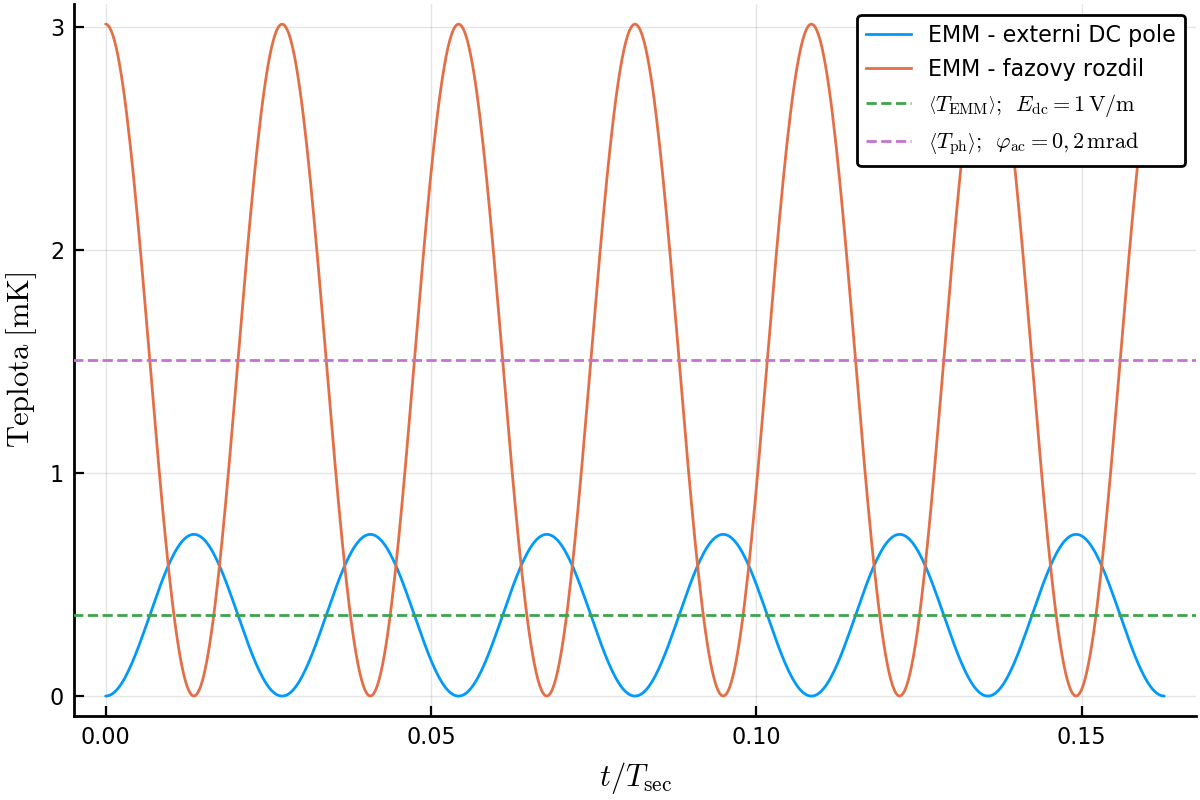

In [4]:
# test vykresleni trajektorie

using Plots
#using PyPlot
using PhysicalConstants.CODATA2018
using Unitful
using Statistics
using LaTeXStrings
using PyCall


rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 12
rcParams["mathtext.fontset"] = "cm"
rcParams["mathtext.rm"] = "serif"
rcParams["text.usetex"] = "false"

include("get_mathi_traj.jl")

# parametry pasti
Vrf = 500  # napeti radialnich elektrod [V]
Udc = 1300  # napeti axialnich elektrod [V]
Ω = 2*pi * 30e6 # budici frekvence pasti [Hz]

T = 0.5e-3 # teplota iontu
E_ext = [0,1,0]
delta_phi = [0,2e-4,0] # fazovy rozdil protejsich radialnich elektrod [x, y, 0]
phi = [0,0,0]

# casovy rozsah
tspan = range(0, 2*pi/Ω * 3, length=601)  # drive freq.
#tspan = range(0, 6.145235e-7, length=601)   # sekularni freq.
# analyticke reseni
(u_sec, u_IMM, u_EMM,u_EMM_phase, Per_sec) = get_mathi_traj(Vrf, Udc, Ω, T, E_ext,
    delta_phi, phi, tspan, div=true, sym_type=false)

u = u_sec + u_IMM + u_EMM + u_EMM_phase # celkovy pohyb iontu

(E_kin_sec, T_kin_sec) = get_E_kin_1D(u_sec[:,2])
(E_kin_IMM, T_kin_IMM) = get_E_kin_1D(u_IMM[:,2])
(E_kin_EMM, T_kin_EMM) = get_E_kin_1D(u_EMM[:,2])
(E_kin_EMM_phase, T_kin_EMM_phase) = get_E_kin_1D(u_EMM_phase[:,2])



pyplot()
#gr()
plot(tspan/Per_sec[2], T_kin_EMM * 1e3, label="EMM - externi DC pole", dpi=200, legend=:topright)
plot!(tspan/Per_sec[2], T_kin_EMM_phase * 1e3, label="EMM - fazovy rozdil")
xlabel!(L"$ t/T_{\rm{sec}} $")
ylabel!(L" \rm{Teplota \,\,[mK]}")
#plot!(tspan, T_kin_EMM)
hline!( [mean(T_kin_EMM)*1e3] , linestyle=:dash, label=L"$ \left< T_{\rm{EMM}} \right>;\,\,\, E_{\rm{dc}} = 1 \, \rm{V/m} $")
hline!([ mean(T_kin_EMM_phase)*1e3], linestyle=:dash, label=L"$ \left< T_{\rm{ph}} \right>;\,\,\, \varphi_{\rm{ac}} = 0,2 \, \rm{mrad}  $")

#savefig("D:\\Onedrive_vut\\ÚPT\\diplomka\\Julia_vypocty_diplomka\\ion_temperature_plots\\temp_vs_t_sec_IMM.pdf")
#savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/ion_temperature_plots/temp_vs_t_EMM_EMMphase.pdf")

## test spravnosti
#(u_test, Per_sec_test) = get_mathi_traj(Vrf, Udc, Ω, T, E_ext,
#    delta_phi, phi, tspan, div=false, sym_type=false)

#print(u_test ≈ u)  -- true


In [3]:
savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/ion_temperature_plots/temp_vs_t_EMM_EMMphase.svg")